In [25]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2)
import pandas as pd
import math, copy

In [3]:

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [20]:
n_cols = df.shape[1]
print(n_cols)

X_features = df.columns[:-1]
print(X_features)
X_train = df.drop(columns=['medv']).to_numpy()
y_train = df['medv'].to_numpy()   
print(np.shape(y_train))
print(np.shape(X_train))

14
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')
(506,)
(506, 13)


In [60]:
# NORMALISATION

X_mean=np.mean(X_train, axis=0)
X_std=np.std(X_train, axis=0)
print(X_mean.shape)

X_train_norm=(X_train-X_mean)/X_std

y_mean=np.mean(y_train)
y_std=np.std(y_train)
print(y_mean.shape)

y_train_norm=(y_train-y_mean)/y_std

y_train=y_train_norm

(13,)
()


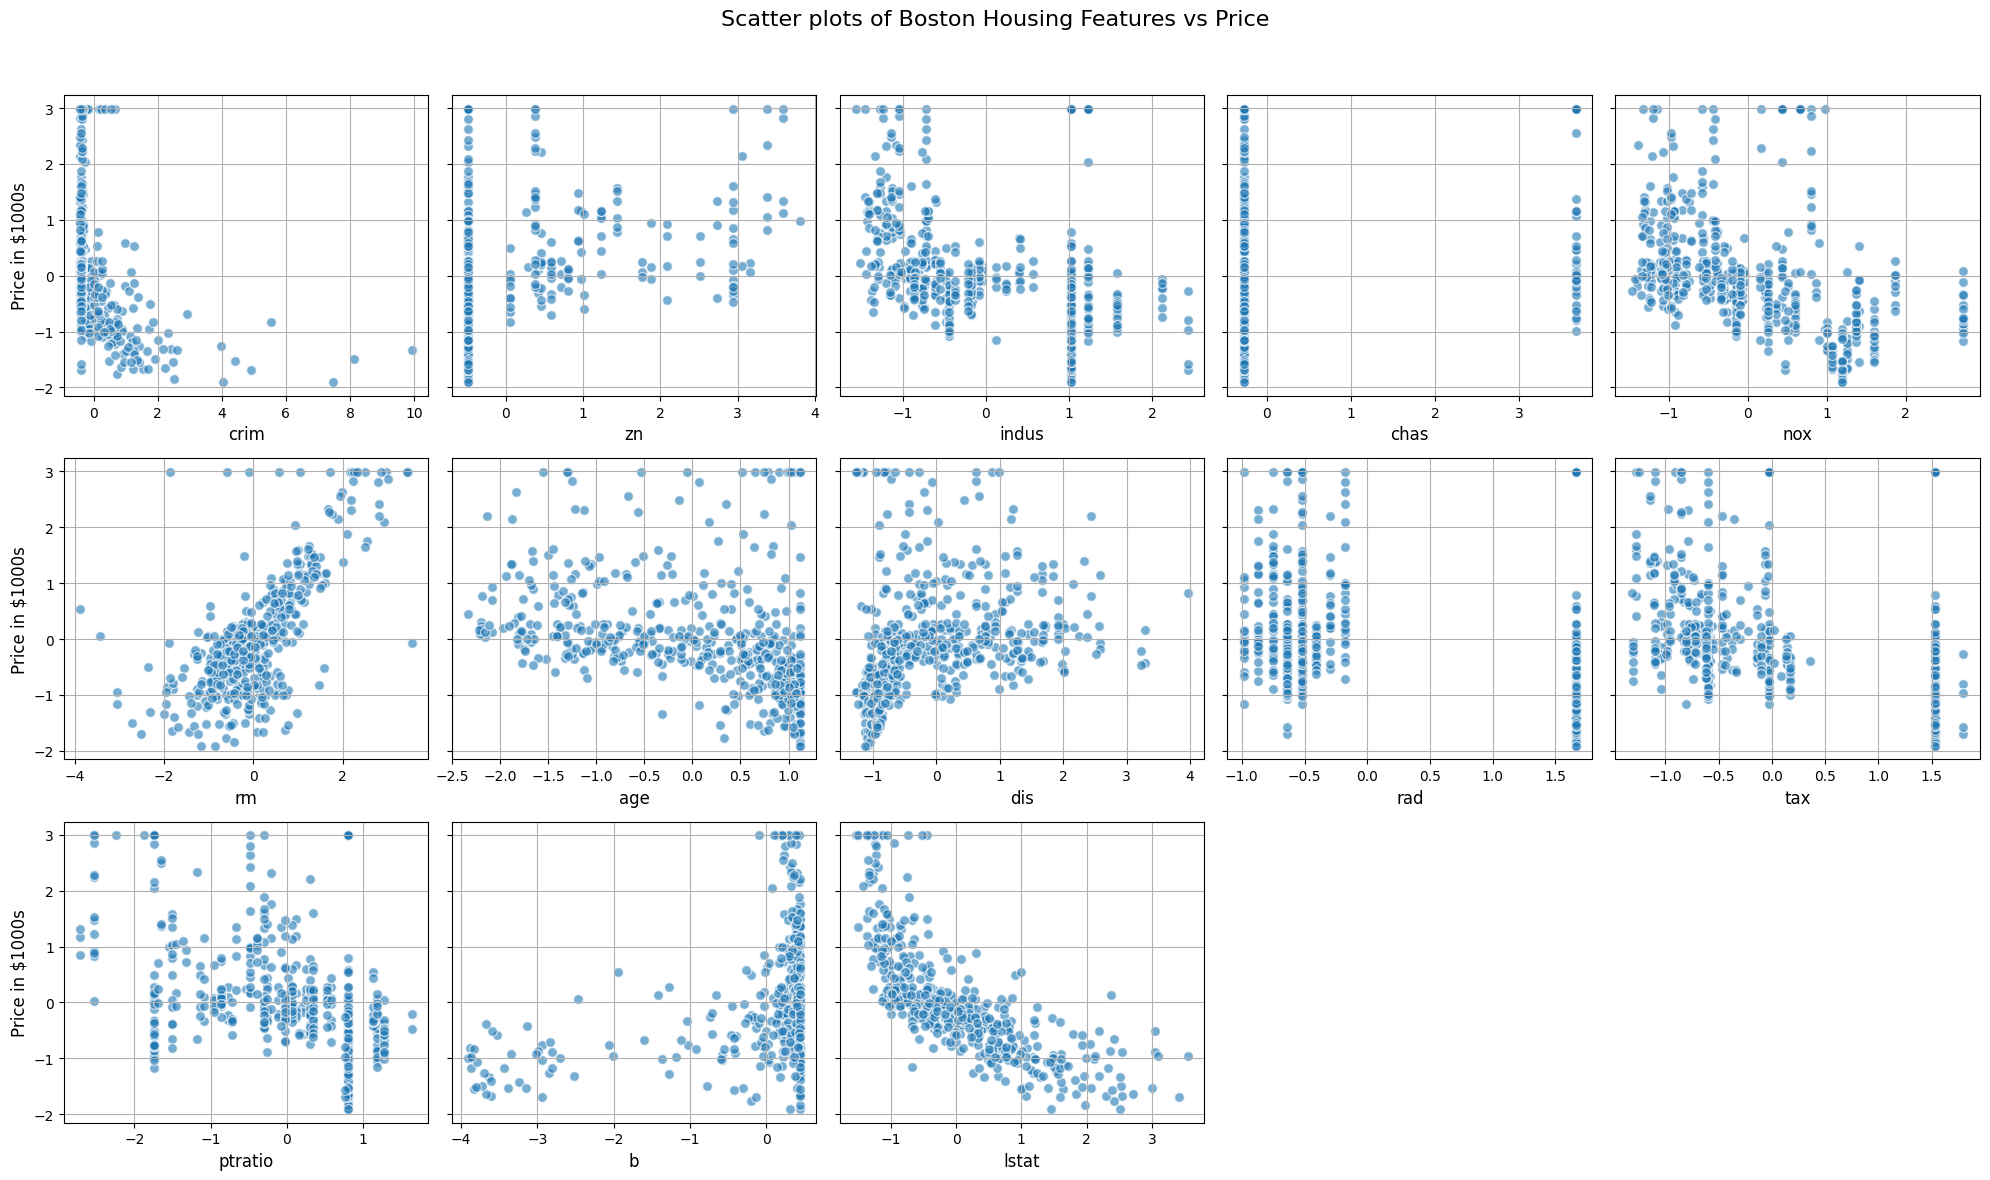

In [61]:
n = len(X_features)


rows, cols = 3, 5

fig, ax = plt.subplots(rows, cols, figsize=(20, 12), sharey=True)
ax = ax.flatten()  # Flatten 2D array of axes to 1D for easy iteration

for i in range(n):
    ax[i].scatter(X_train_norm[:, i], y_train, alpha=0.6, edgecolors='w', s=50)
    ax[i].set_xlabel(X_features[i], fontsize=12)
    ax[i].grid(True)

# Label y-axis only on first column subplots for clarity
for i in range(0, n, cols):
    ax[i].set_ylabel("Price in $1000s", fontsize=12)

# Hide any unused subplots (e.g., the last two in 3x5 grid)
for j in range(n, rows * cols):
    ax[j].axis('off')

plt.suptitle("Scatter plots of Boston Housing Features vs Price", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()

In [23]:
def compute_cost(w, x, y, b):

    n=len(x)
    m=x.shape[0]
    cost=0
    for i in range(n):
        cost+=(np.dot(x[i], w)+b-y[i])**2
    cost=cost/(2*n)
    return cost

In [22]:
def predict(w, x, b):

    p=np.dot(w, x)+b
    return p

In [28]:
def compute_gradient(w, x, b, y):

    m, n=x.shape

    dj_dw=np.zeros(n)
    dj_db=0

    for i in range(m):

        err=np.dot(x[i], w)+b-y[i]
        for j in range(n):

            dj_dw[j]=dj_dw[j]+err*x[i, j]
        dj_db=dj_db+err

    dj_dw=dj_dw/m
    dj_db=dj_db/m

    return dj_dw, dj_db

In [29]:
def gradient_descent(w_in, b_in, x, y, compute_cost, compute_gradient, num_iters, alpha):

    J_history=[]
    w=copy.deepcopy(w_in)
    b=b_in

    for i in range(num_iters):

        dj_dw, dj_db=compute_gradient(w, x, b, y)

        w=w-alpha*dj_dw
        b=b-alpha*dj_db

        if i<100000:     
            J_history.append( compute_cost(w,x,y,b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history


In [62]:
m, n=X_train.shape
w_in=np.zeros(n)
b_in=0.

iterations = 5000
alpha =  1e-2

w_final, b_final, J_hist = gradient_descent(w_in, b_in, X_train_norm, y_train,
                                                    compute_cost, compute_gradient, 
                                                    iterations, alpha)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")




Iteration    0: Cost     0.47   
Iteration  500: Cost     0.13   
Iteration 1000: Cost     0.13   
Iteration 1500: Cost     0.13   
Iteration 2000: Cost     0.13   
Iteration 2500: Cost     0.13   
Iteration 3000: Cost     0.13   
Iteration 3500: Cost     0.13   
Iteration 4000: Cost     0.13   
Iteration 4500: Cost     0.13   
b,w found by gradient descent: -0.00,[-0.1   0.12  0.01  0.07 -0.22  0.29  0.   -0.34  0.28 -0.21 -0.22  0.09
 -0.41] 
prediction: -29.51, target value: 0.1596856587150597
prediction: -22.23, target value: -0.1015242873296184
prediction: -20.33, target value: 1.3242466681642504
prediction: -15.84, target value: 1.1827579473900494
prediction: -16.55, target value: 1.4875028844421743
prediction: -16.96, target value: 0.6712218030525545
prediction: -35.99, target value: 0.039964433444582
prediction: -38.65, target value: 0.4970818390227692
prediction: -44.19, target value: -0.6565954226745598
prediction: -39.04, target value: -0.3953854766298817
prediction: -39.67,

In [63]:
predicted=np.dot(X_train, w_final)+b_final
print(predicted)

[ -29.51  -22.23  -20.33  -15.84  -16.55  -16.96  -35.99  -38.65  -44.19
  -39.04  -39.67  -36.42  -37.84  -36.14  -38.35  -36.31  -36.41  -39.51
  -47.39  -37.67  -43.02  -38.55  -40.11  -40.9   -39.51  -48.13  -40.65
  -48.05  -38.53  -38.82  -45.28  -39.75  -59.03  -43.53  -54.46  -29.51
  -32.05  -29.4   -30.24  -13.85  -12.78  -19.62  -20.37  -20.    -21.32
  -20.81  -22.39  -24.72  -29.45  -23.57  -21.91  -20.35  -18.34  -19.77
  -66.08   -6.97  -27.67  -11.53  -27.89  -28.01  -29.9   -31.76  -26.91
  -28.36  -15.71  -31.29  -33.68  -43.01  -45.04  -43.21  -35.93  -37.96
  -34.87  -36.93  -54.19  -56.18  -58.1   -56.27  -57.44  -55.19  -25.98
  -26.86  -26.69  -27.61  -23.39  -22.36  -24.79  -22.79  -26.11  -26.28
  -27.98  -27.6   -23.79  -22.98  -24.61  -31.69  -30.59  -26.65  -26.83
  -27.66  -52.1   -51.33  -82.58  -53.91  -53.5   -55.03  -55.83  -54.59
  -53.14  -54.98  -53.86  -61.62  -64.25  -64.45  -62.36  -68.73  -62.79
  -62.    -69.19  -63.74  -12.83  -13.77  -15.18  -

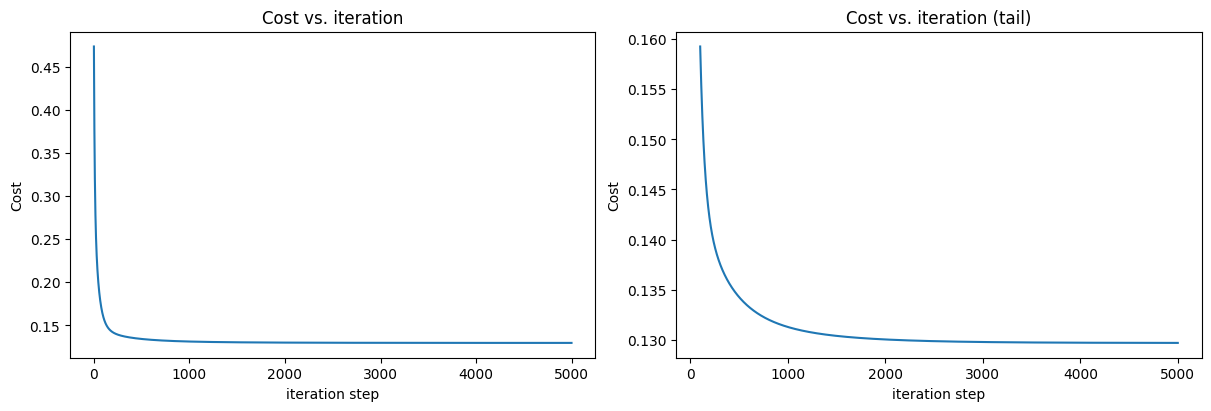

In [64]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

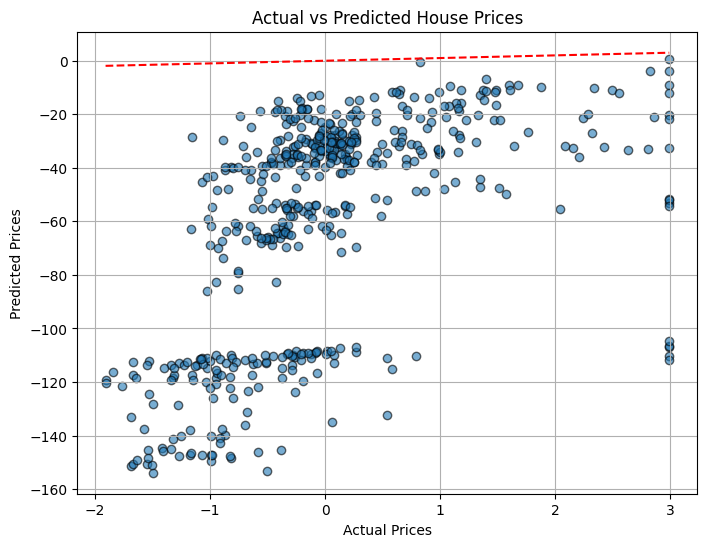

In [65]:

plt.figure(figsize=(8, 6))
plt.scatter(y_train, predicted, alpha=0.6, edgecolors='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # ideal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

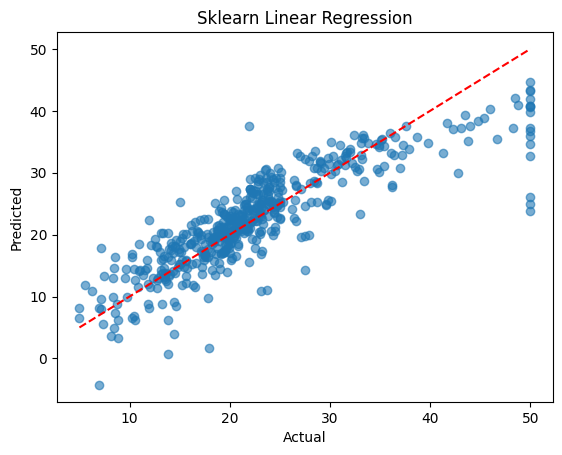

In [57]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train_norm, y_train)
y_pred=model.predict(X_train_norm)

plt.scatter(y_train, y_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Sklearn Linear Regression")
plt.show()
